### Descriptive Statistics ###

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv("Use_This.csv", header=0, index_col=0)
print(data.head())

   Year  Assigned_ID     Bank  IncRat     UPB   LTV  MortDate  Purpose  Coop  \
0  2016      2004452  Atlanta  1.5112  383368  0.84      2015        2     2   
1  2016      2004453  Atlanta  0.7347  112822  0.76      2015        2     2   
2  2016      2004454  Atlanta  0.8536  125345  1.00      2015        1     2   
3  2016      2004455  Atlanta  1.4262  162084  1.03      2015        1     2   
4  2016      2004456  Atlanta  2.0272  396490  0.89      2015        1     2   

   Product  FedGuar  Occup   Front    Back  BoCreditScor PropType  \
0        1        2      1  0.2174  0.3683             4     PT07   
1        1        2      1  0.1850  0.2385             4     PT01   
2        1        2      1  0.2084  0.3817             4     PT01   
3        1        2      1  0.1481  0.3170             4     PT01   
4        1        2      1  0.2072  0.3184             4     PT07   

   Portfolio_Worthy  
0                 1  
1                 1  
2                 1  
3               

In [2]:
# Displaying the data types of each attribute
## Changing target attribute to boolean data type
data.Portfolio_Worthy = data.Portfolio_Worthy.astype(bool)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60989 entries, 0 to 60988
Data columns (total 17 columns):
Year                60989 non-null int64
Assigned_ID         60989 non-null int64
Bank                60989 non-null object
IncRat              60989 non-null float64
UPB                 60989 non-null int64
LTV                 60989 non-null float64
MortDate            60989 non-null int64
Purpose             60989 non-null int64
Coop                60989 non-null int64
Product             60989 non-null int64
FedGuar             60989 non-null int64
Occup               60989 non-null int64
Front               60989 non-null float64
Back                60989 non-null float64
BoCreditScor        60989 non-null int64
PropType            60989 non-null object
Portfolio_Worthy    60989 non-null bool
dtypes: bool(1), float64(4), int64(10), object(2)
memory usage: 8.0+ MB


In [3]:
# Describing the data
data.describe()

,Year,Assigned_ID,IncRat,UPB,LTV,MortDate,Purpose,Coop,Product,FedGuar,Occup,Front,Back,BoCreditScor
count,60989.0,6.098900e+04,60989.000000,60989.000000,60989.000000,60989.000000,60989.000000,60989.0,60989.0,60989.000000,60989.000000,60989.000000,60989.000000,60989.000000
mean,2016.0,2.033385e+06,1.650246,211973.001886,0.746919,2015.947023,1.559183,2.0,1.0,0.146666,1.019577,0.188368,0.290169,4.484825
std,0.0,1.846637e+04,2.031755,120582.737916,0.156082,0.233522,0.504450,0.0,0.0,0.561976,0.138544,0.073599,0.088374,0.773287
min,2016.0,2.002345e+06,0.015900,11500.000000,0.010000,2013.000000,1.000000,2.0,1.0,0.000000,1.000000,0.000100,0.004200,1.000000
25%,2016.0,2.017593e+06,0.938600,120914.000000,0.670000,2016.000000,1.000000,2.0,1.0,0.000000,1.000000,0.135700,0.222800,4.000000
50%,2016.0,2.032841e+06,1.380200,184000.000000,0.800000,2016.000000,2.000000,2.0,1.0,0.000000,1.000000,0.180000,0.290000,5.000000
75%,2016.0,2.048088e+06,1.965700,276000.000000,0.800000,2016.000000,2.000000,2.0,1.0,0.000000,1.000000,0.230000,0.360000,5.000000
max,2016.0,2.067614e+06,176.626300,787838.000000,1.390000,2016.000000,4.000000,2.0,1.0,3.000000,2.000000,0.972000,0.988800,9.000000


##### Histograms #####

(array([6.0946e+04, 2.9000e+01, 3.0000e+00, 2.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00]), array([1.5900000e-02, 1.7676940e+01, 3.5337980e+01, 5.2999020e+01,
       7.0660060e+01, 8.8321100e+01, 1.0598214e+02, 1.2364318e+02,
       1.4130422e+02, 1.5896526e+02, 1.7662630e+02]), <a list of 10 Patch objects>)


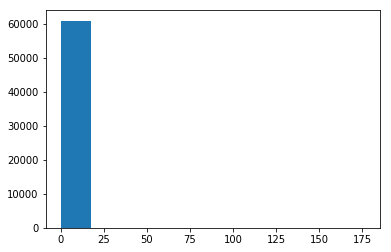

In [4]:
print(plt.hist(data.IncRat))

(array([7.2890e+03, 1.9418e+04, 1.4669e+04, 8.9210e+03, 4.9280e+03,
       3.5510e+03, 1.1560e+03, 1.0430e+03, 8.0000e+00, 6.0000e+00]), array([ 11500. ,  89133.8, 166767.6, 244401.4, 322035.2, 399669. ,
       477302.8, 554936.6, 632570.4, 710204.2, 787838. ]), <a list of 10 Patch objects>)


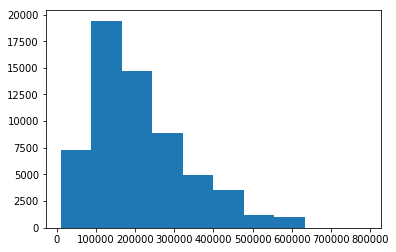

In [5]:
print(plt.hist(data.UPB))

(array([4.2000e+01, 6.2600e+02, 2.1100e+03, 4.9600e+03, 9.6650e+03,
       3.0411e+04, 1.0286e+04, 2.8810e+03, 7.0000e+00, 1.0000e+00]), array([0.01 , 0.148, 0.286, 0.424, 0.562, 0.7  , 0.838, 0.976, 1.114,
       1.252, 1.39 ]), <a list of 10 Patch objects>)


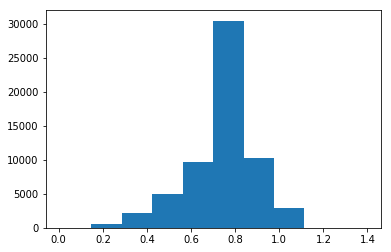

In [6]:
print(plt.hist(data.LTV))

(array([27047.,     0.,     0., 33861.,     0.,     0.,     0.,     0.,
           0.,    81.]), array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]), <a list of 10 Patch objects>)


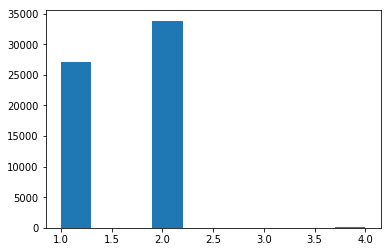

In [7]:
print(plt.hist(data.Purpose))

(array([    0.,     0.,     0.,     0.,     0., 60989.,     0.,     0.,
           0.,     0.]), array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]), <a list of 10 Patch objects>)


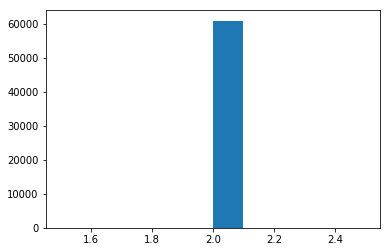

In [8]:
print(plt.hist(data.Coop))

(array([56512.,     0.,     0.,  1355.,     0.,     0.,  1776.,     0.,
           0.,  1346.]), array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]), <a list of 10 Patch objects>)


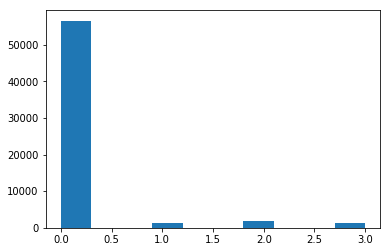

In [9]:
print(plt.hist(data.FedGuar))

(array([   85.,  1452.,  5002., 17020.,     0., 37355.,     0.,     0.,
           0.,    75.]), array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]), <a list of 10 Patch objects>)


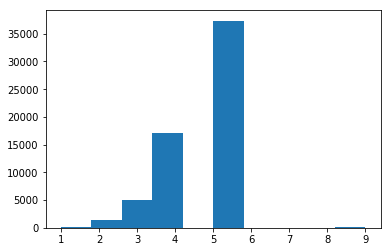

In [11]:
print(plt.hist(data.BoCreditScor))

(array([4.6750e+03, 3.1208e+04, 1.9445e+04, 4.9390e+03, 7.0700e+02,
       8.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00]), array([1.0000e-04, 9.7290e-02, 1.9448e-01, 2.9167e-01, 3.8886e-01,
       4.8605e-01, 5.8324e-01, 6.8043e-01, 7.7762e-01, 8.7481e-01,
       9.7200e-01]), <a list of 10 Patch objects>)


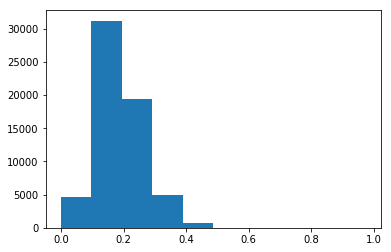

In [20]:
print(plt.hist(data.Front))

(array([6.8600e+02, 1.0355e+04, 2.0893e+04, 2.1533e+04, 7.2080e+03,
       2.8000e+02, 1.7000e+01, 8.0000e+00, 5.0000e+00, 4.0000e+00]), array([0.0042 , 0.10266, 0.20112, 0.29958, 0.39804, 0.4965 , 0.59496,
       0.69342, 0.79188, 0.89034, 0.9888 ]), <a list of 10 Patch objects>)


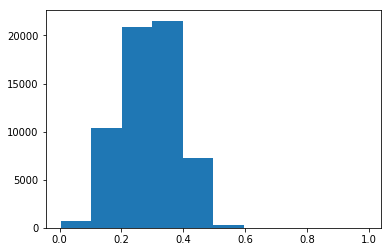

In [21]:
print(plt.hist(data.Back))

In [13]:
# Showing value counts for target feature
print(data.Portfolio_Worthy.value_counts())

True     56996
False     3993
Name: Portfolio_Worthy, dtype: int64


##### Boxplots #####

{'whiskers': [<matplotlib.lines.Line2D object at 0x0000029CA61F7860>, <matplotlib.lines.Line2D object at 0x0000029CA61F7C88>], 'caps': [<matplotlib.lines.Line2D object at 0x0000029CA61F7D68>, <matplotlib.lines.Line2D object at 0x0000029CA6201518>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000029CA61F7320>], 'medians': [<matplotlib.lines.Line2D object at 0x0000029CA6201940>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000029CA6201D68>], 'means': []}


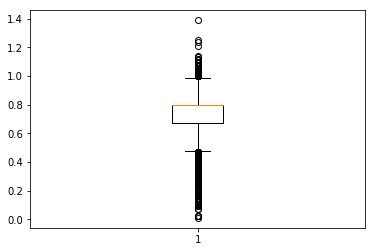

In [14]:
print(plt.boxplot(data.LTV))

{'whiskers': [<matplotlib.lines.Line2D object at 0x0000029CA62B0D30>, <matplotlib.lines.Line2D object at 0x0000029CA62B9588>], 'caps': [<matplotlib.lines.Line2D object at 0x0000029CA62B99B0>, <matplotlib.lines.Line2D object at 0x0000029CA62B9DD8>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000029CA62B0BE0>], 'medians': [<matplotlib.lines.Line2D object at 0x0000029CA62B9EB8>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000029CA62BF668>], 'means': []}


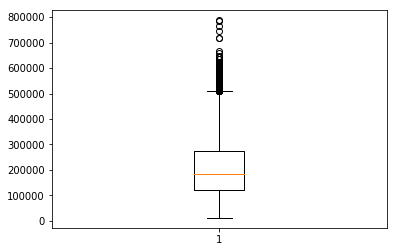

In [16]:
print(plt.boxplot(data.UPB))

{'whiskers': [<matplotlib.lines.Line2D object at 0x0000029CA62DC198>, <matplotlib.lines.Line2D object at 0x0000029CA62B0438>], 'caps': [<matplotlib.lines.Line2D object at 0x0000029CA62B0BA8>, <matplotlib.lines.Line2D object at 0x0000029CA62B0D68>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000029CA62DC630>], 'medians': [<matplotlib.lines.Line2D object at 0x0000029CA62BF6D8>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000029CA62BF278>], 'means': []}


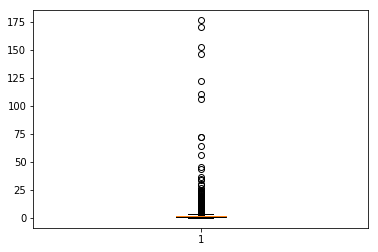

In [17]:
print(plt.boxplot(data.IncRat))

{'whiskers': [<matplotlib.lines.Line2D object at 0x0000029CA620B278>, <matplotlib.lines.Line2D object at 0x0000029CA620B0F0>], 'caps': [<matplotlib.lines.Line2D object at 0x0000029CA6201438>, <matplotlib.lines.Line2D object at 0x0000029CA6201710>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000029CA620B978>], 'medians': [<matplotlib.lines.Line2D object at 0x0000029CA62018D0>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000029CA61A6240>], 'means': []}


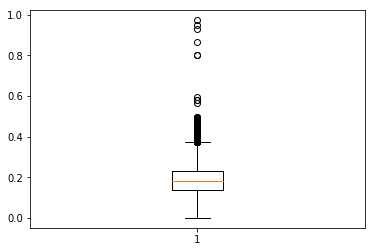

In [18]:
print(plt.boxplot(data.Front))

{'whiskers': [<matplotlib.lines.Line2D object at 0x0000029CA5E80EB8>, <matplotlib.lines.Line2D object at 0x0000029CA5E80828>], 'caps': [<matplotlib.lines.Line2D object at 0x0000029CA5E80278>, <matplotlib.lines.Line2D object at 0x0000029CA5518C88>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000029CA5E80AC8>], 'medians': [<matplotlib.lines.Line2D object at 0x0000029CA55182E8>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000029CA5518A90>], 'means': []}


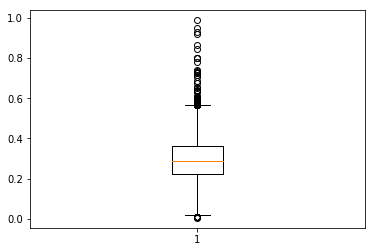

In [19]:
print(plt.boxplot(data.Back))

{'whiskers': [<matplotlib.lines.Line2D object at 0x0000029CA5366B38>, <matplotlib.lines.Line2D object at 0x0000029CA53660B8>], 'caps': [<matplotlib.lines.Line2D object at 0x0000029CA5366668>, <matplotlib.lines.Line2D object at 0x0000029CA5390A58>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000029CA53667B8>], 'medians': [<matplotlib.lines.Line2D object at 0x0000029CA5390C88>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000029CA5390DD8>], 'means': []}


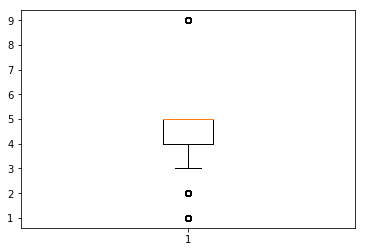

In [22]:
print(plt.boxplot(data.BoCreditScor))

##### Correlation #####

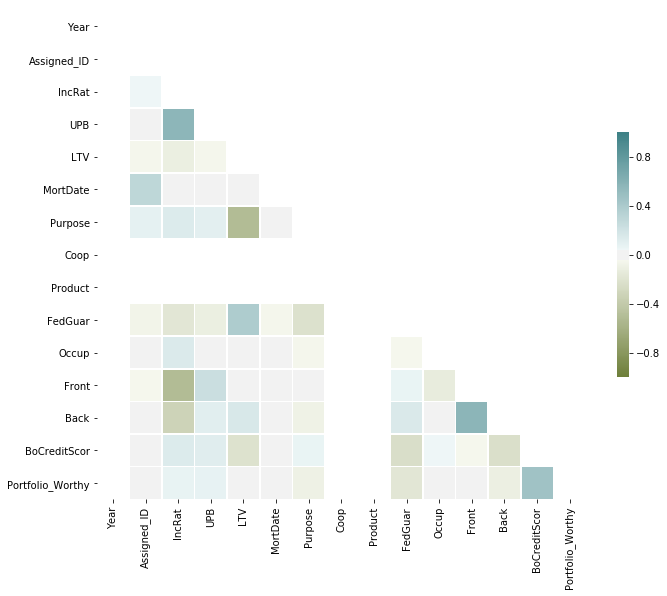

In [23]:
### WE ARE USING THIS CODE FROM COMPETITION 1

## We will make it look nicer to the eye
# Visualizing a Correlation Matrix
correlation_visual = data.corr(method='spearman')

# Have to generate a mask(hide) for the upper triangle
hide = np.zeros_like(correlation_visual, dtype=np.bool)
hide[np.triu_indices_from(hide)] = True

# Setting the subplot for the correlation matrix
f , ax = plt.subplots(figsize=(11,9))

# Generating a diverging colormap
cmap = sns.diverging_palette(100, 200, as_cmap=True)

# Adding the heatmap
sns.heatmap(correlation_visual, mask=hide, cmap=cmap, vmin=-1,vmax=1, center=0, square=True, linewidths=.6, cbar_kws={"shrink": .5})

In [24]:
print(data.corr(method='spearman'))

                  Year  Assigned_ID    IncRat       UPB       LTV  MortDate  \
Year               NaN          NaN       NaN       NaN       NaN       NaN   
Assigned_ID        NaN     1.000000  0.044403  0.000520 -0.053542  0.301043   
IncRat             NaN     0.044403  1.000000  0.570201 -0.115950  0.019856   
UPB                NaN     0.000520  0.570201  1.000000 -0.049032  0.016388   
LTV                NaN    -0.053542 -0.115950 -0.049032  1.000000 -0.003637   
MortDate           NaN     0.301043  0.019856  0.016388 -0.003637  1.000000   
Purpose            NaN     0.091563  0.133106  0.107097 -0.510549  0.019732   
Coop               NaN          NaN       NaN       NaN       NaN       NaN   
Product            NaN          NaN       NaN       NaN       NaN       NaN   
FedGuar            NaN    -0.062828 -0.172637 -0.114016  0.384316 -0.049808   
Occup              NaN     0.008516  0.141410  0.006224 -0.020830  0.011988   
Front              NaN    -0.043711 -0.511243  0.237